In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.interpret import NetLens

In [2]:
IMAGE_PATH = '../../images/examples/'

In [3]:
original_model = models.alexnet(pretrained=True)
model = FlatModel.from_nested_cnn(original_model)

In [4]:
original_img, name, target_class = get_example_data(0, img_path=IMAGE_PATH)

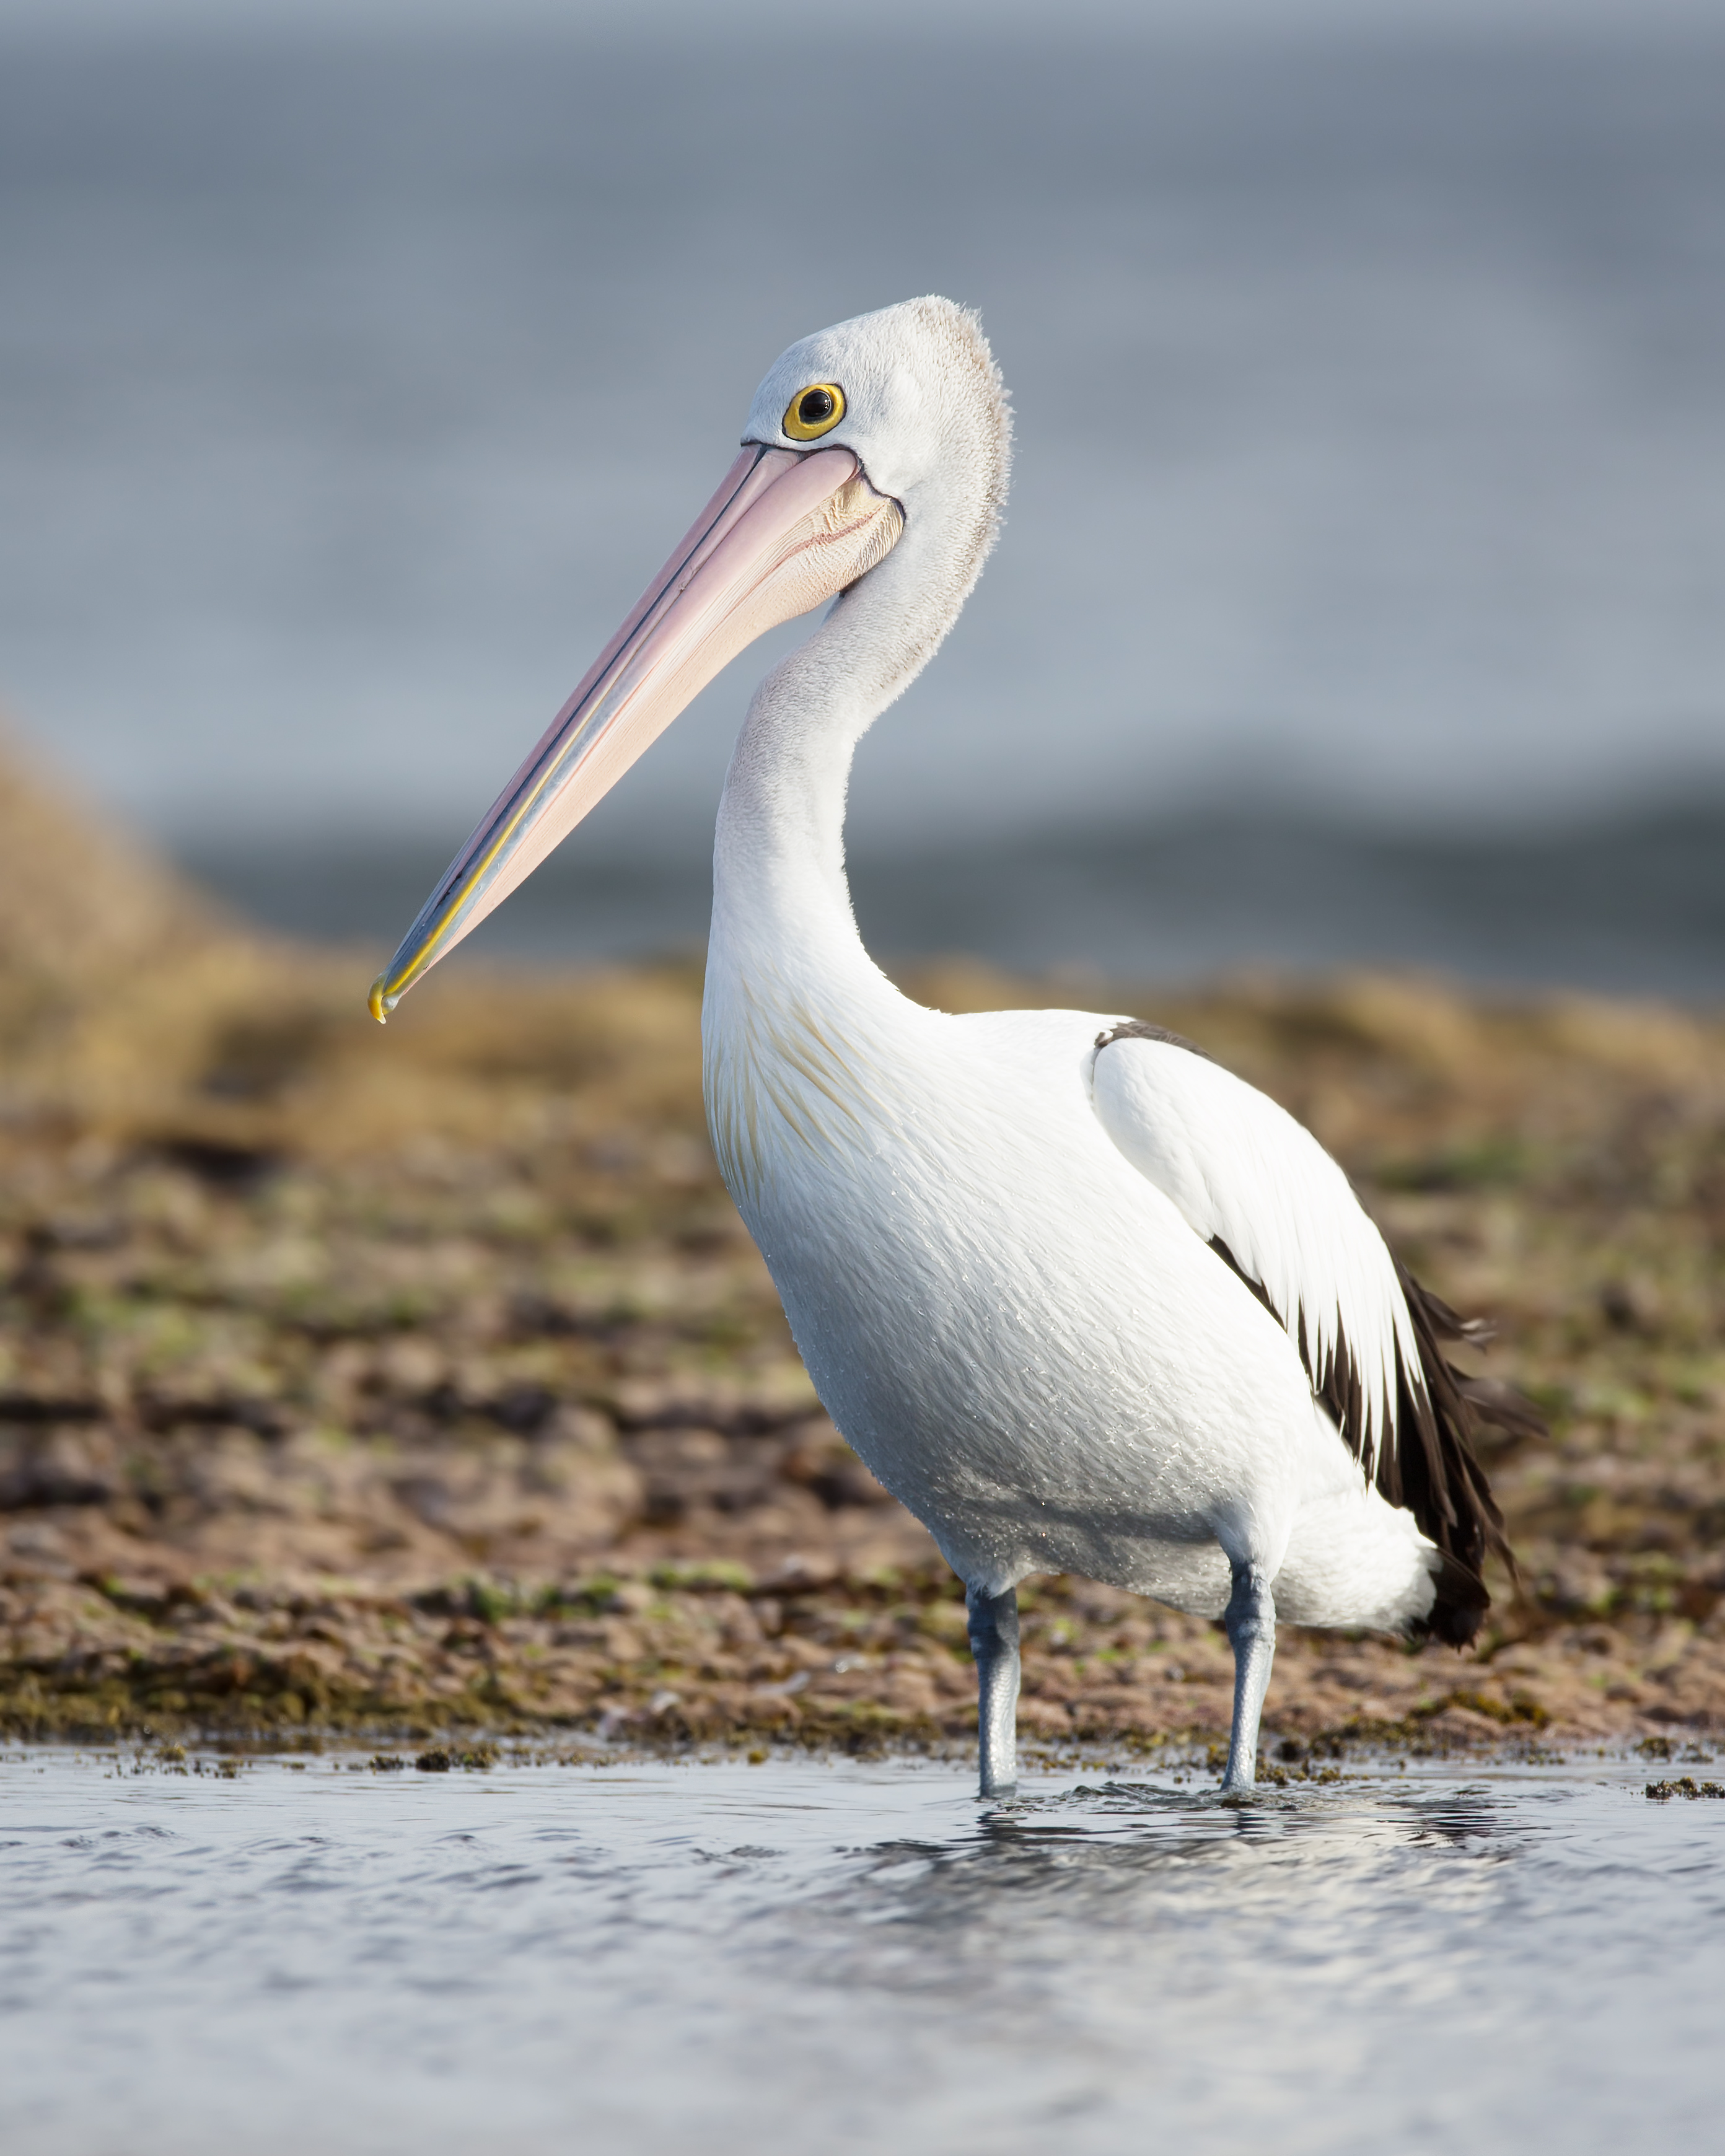

In [5]:
original_img

In [6]:
prep_img = preprocess_image(original_img)

In [7]:
prep_img.shape

torch.Size([1, 3, 224, 179])

In [8]:
nl = NetLens(model, prep_img, target_class)

In [9]:
target_layer = 'features-conv-4'

torch.Size([224, 179])

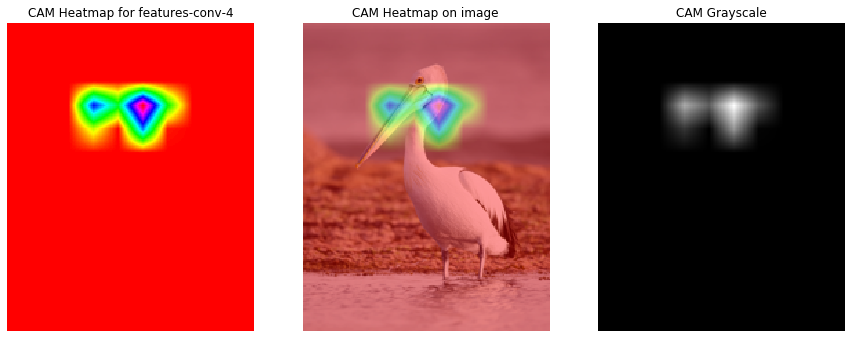

In [10]:
cam = nl.grad_cam(target_layer)
cam.shape

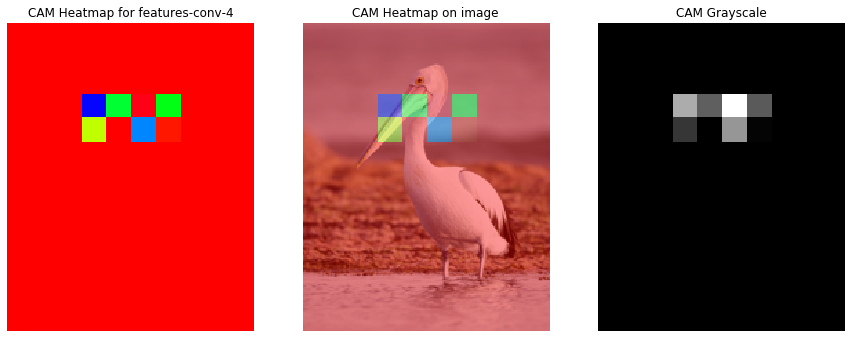

In [11]:
nl.grad_cam(target_layer, interpolate=False);

In [12]:
def get_gradcam(example_index, figsize=(15,8)):
    original_img, name, target_class = get_example_data(example_index, img_path=IMAGE_PATH)
    model = FlatModel.from_nested_cnn(original_model)
    prep_img = preprocess_image(original_img)
    NetLens(model, prep_img, target_class).grad_cam('features-relu-4', figsize=figsize)

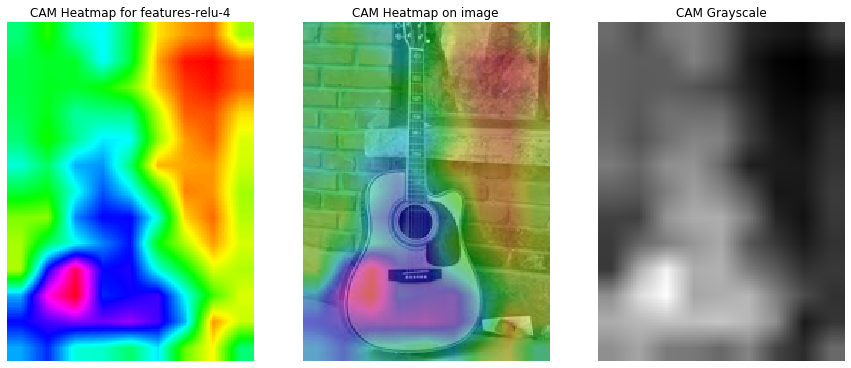

In [13]:
get_gradcam(1)

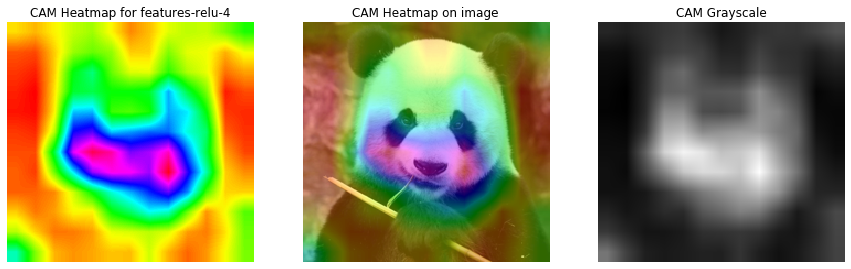

In [14]:
get_gradcam(2)

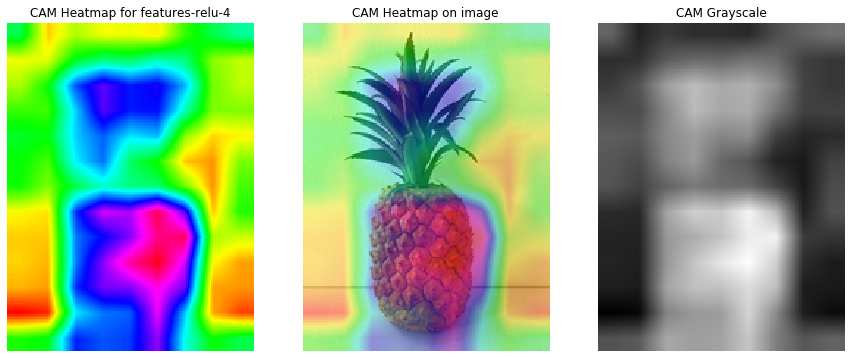

In [15]:
get_gradcam(3)

### Guided GradCAM

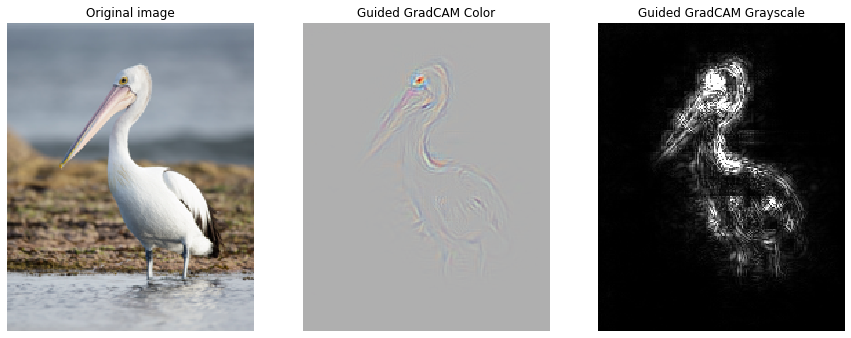

In [16]:
nl.guided_grad_cam('features-relu-4');